## First Homework


1. Input - importing the file
Reading a binary file. 

In [1]:
#packages
import numpy as np
import struct
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [7]:
# Function to decode quaternion components
def decode_quaternion(value):
    return (value - 128) / 128

def extract_splats(binary_data):
    splats = []
    splat_size = 32  # Size of each splat in bytes

    for i in range(0, len(binary_data), splat_size):
        # Unpack the binary data for each component
        position = struct.unpack('3f', binary_data[i:i+12])
        scale = struct.unpack('3f', binary_data[i+12:i+24])
        color = struct.unpack('4B', binary_data[i+24:i+28])
        rotation_quaternion = [decode_quaternion(c) for c in struct.unpack('4B', binary_data[i+28:i+32])]

        # Organize the splat information into a dictionary
        splat_info = {
            'position': position,
            'scale': scale,
            'color': color,
            'rotation_quaternion': rotation_quaternion
        }

        # Append the splat information to the list
        splats.append(splat_info)

    return splats




In [14]:

#reading a binary file, each splat is 32 bytes, no header
file = open("nike.splat", mode ="rb")
data = file.read()
#print(len(data))
file.close()

#saving splats
splat_array = extract_splats(data)

# Print the result for the first splat as an example
print(splat_array[0])

{'position': (0.7570623755455017, 2.0546979904174805, 1.2185053825378418), 'scale': (0.18402865529060364, 0.067222960293293, 0.12055729329586029), 'color': (213, 151, 0, 255), 'rotation_quaternion': [0.9765625, 0.1953125, -0.0078125, -0.109375]}


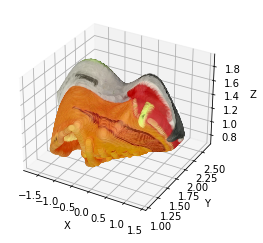

In [15]:
#showing splats in a graph

# Extract x, y, z coordinates and color information from the 'position' and 'color' properties
x = [splat['position'][0] for splat in splat_array]
y = [splat['position'][1] for splat in splat_array]
z = [splat['position'][2] for splat in splat_array]
colors = [(splat['color'][0] / 255, splat['color'][1] / 255, splat['color'][2] / 255, splat['color'][3] / 255) for splat in splat_array]

# Create a 3D scatter plot with specified colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=colors, marker='o')

# Set labels for each axis
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()

2.1 Basic transformations and point rendering


In [ ]:
#adding the camera - view transformation, perspective transformation

#cosntruct a matrix

# transform each splat to screen, color.

2.2 Perspecitve-correct scaling

2.3 Order-correct blending